<a href="https://colab.research.google.com/github/nzungizelab/Genomic-Surveillance-Malaria-Vectors_Africa/blob/NzungizeL/Workshop_7_module_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Module 1 - Organophosphate resistance markers (combining SNP and CNV data)**


*   The acetylcholinesterase enzyme produced by the Ace1 gene is the target for organophosphate insecticides.Both target-site mutations and gene copy number amplifications have been implicated in insecticide resistance phenotypes.
*   Overexpression of the Gste2 gene has also been associated with resistance to some organophosphates, and SNPs in the same gene have been linked to pyrethroid and DDT resistance phenotypes.


In [ ]:
#Setup
#Install and importing some Python packages, and configuring access to Anopheles genomic data from the MalariaGEN Ag3.0 data resource.
!pip install -q --no-warn-conflicts malariagen_data seaborn

In [ ]:
import malariagen_data
import pandas as pd

In [ ]:
ag3 = malariagen_data.Ag3()
ag3

<MalariaGEN Ag3 API client>
Storage URL             : gs://vo_agam_release/
Data releases available : 3.0
Results cache           : None
Cohorts analysis        : 20230516
AIM analysis            : 20220528
Site filters analysis   : dt_20200416
Software version        : malariagen_data 7.12.0
Client location         : Iowa, US
---
Please note that data are subject to terms of use,
for more information see https://www.malariagen.net/data
or contact data@malariagen.net. For API documentation see 
https://malariagen.github.io/vector-data/ag3/api.html

# **The Ace1 gene**

*   Acetylcholinesterase, also known as AChE, is an essential carboxylesterase
enzyme in the nervous system of animals. AChE breaks down the neurotransmitter acetylcholine.
*   LIn anophelines, the AChE protein is produced by the Ace1 gene.
*   Organophosphate (OP) and carbamate insecticides block the action of AChE via competitive binding.

*   LNon-synonymous “target-site” mutations in Ace1 can confer resistance to both carbamate and OP insecticides by reducing how well they bind to AChE.
*   these mutations make AChE less effective in the absence of insecticides. Due to the important role that AChE plays in the nervous system, these resistant phenotypes come with a high fitness cost.


*   Pirimiphos methyl (PM) is an OP insecticide used for indoor residual spraying (IRS). With the increase of pyrethroid and carbamate resistance, WHO has recommend PM for IRS since 2013. PM is the active ingredient in the IRS product Actellic CS, and is now being widely used, hence the importance of tracking known OP resistance markers.



In [ ]:
# investigate SNP and amino acid substitution frequencies in the Vgsc gene (the target of pyrethroid and DDT insecticides).
# remind ourselves what parameters we need for this function.
ag3.aa_allele_frequencies?

In [ ]:
ace1_aa_freqs_df = ag3.aa_allele_frequencies(
    transcript="AGAP001356-RA",
    cohorts="admin1_year",
    sample_query='taxon == "coluzzii"'
)

ace1_aa_freqs_df

Load SNP genotypes:   0%|          | 0/52 [00:00<?, ?it/s]

Compute allele frequencies:   0%|          | 0/22 [00:00<?, ?it/s]

Compute SNP effects:   0%|          | 0/5151 [00:00<?, ?it/s]

frq_AO-LUA_colu_2009  frq_BF-09_colu_2012  \
aa_change contig position                                              
R4G       2R     3489222               0.000000             0.006098   
P19T      2R     3489267               0.000000             0.000000   
G24C      2R     3489282               0.006173             0.000000   
G24S      2R     3489282               0.000000             0.000000   
V25L      2R     3489285               0.000000             0.000000   
...                                         ...                  ...   
L721Q     2R     3493736               0.000000             0.000000   
V726M     2R     3493750               0.000000             0.000000   
A731V     2R     3493766               0.000000             0.012195   
V733A     2R     3493772               0.000000             0.006098   
R734T     2R     3493775               0.000000             0.000000   

                           frq_BF-09_colu_2014  frq_CF-BGF_colu_1994  \
aa_change contig position                                              
R4G       2R     3489222              0.000000                   0.0   
P19T      2R     3489267              0.000000                   0.0   
G24C      2R     3489282              0.000000                   0.0   
G24S      2R     3489282              0.000000                   0.0   
V25L      2R     3489285              0.000000                   0.0   
...                                        ...                   ...   
L721Q     2R     3493736              0.000000                   0.0   
V726M     2R     3493750              0.009434                   0.0   
A731V     2R     3493766              0.009434                   0.0   
V733A     2R     3493772              0.000000                   0.0   
R734T     2R     3493775              0.000000                   0.0   

                           frq_CI-LG_colu_2012  frq_CM-CE_colu_2013  \
aa_change contig position                                             
R4G       2R     3489222                0.0000                  0.0   
P19T      2R     3489267                0.0000                  0.0   
G24C      2R     3489282                0.0000                  0.0   
G24S      2R     3489282                0.0000                  0.0   
V25L      2R     3489285                0.0000                  0.0   
...                                        ...                  ...   
L721Q     2R     3493736                0.0000                  0.0   
V726M     2R     3493750                0.0000                  0.0   
A731V     2R     3493766                0.0125                  0.0   
V733A     2R     3493772                0.0000                  0.0   
R734T     2R     3493775                0.0000                  0.0   

                           frq_GH-AA_colu_2012  frq_GH-CP_colu_2012  \
aa_change contig position                                             
R4G       2R     3489222              0.000000                 0.00   
P19T      2R     3489267              0.000000                 0.00   
G24C      2R     3489282              0.000000                 0.00   
G24S      2R     3489282              0.000000                 0.00   
V25L      2R     3489285              0.000000                 0.00   
...                                        ...                  ...   
L721Q     2R     3493736              0.000000                 0.02   
V726M     2R     3493750              0.000000                 0.00   
A731V     2R     3493766              0.000000                 0.00   
V733A     2R     3493772              0.035714                 0.00   
R734T     2R     3493775              0.000000                 0.02   

                           frq_GH-WP_colu_2012  frq_GN-N_colu_2012  ...  \
aa_change contig position                                           ...   
R4G       2R     3489222                   0.0                 0.0  ...   
P19T      2R     3489267                   0.0                 0.0  ...   
G24C 

We get 130 amino acid changes from our coluzzii cohorts, but many are at low frequencies. Let’s filter our DataFrame using query to just alternative amino acid frequencies greater than, or equal to 5%.

In [ ]:
#Let’s filter amino acid frequencies greater than, or equal to 5%.
ace1_aa_filt_df = ace1_aa_freqs_df.query("max_af >= 0.05")
ace1_aa_filt_df

frq_AO-LUA_colu_2009  frq_BF-09_colu_2012  \
aa_change contig position                                              
F35S      2R     3489316               1.000000             0.975610   
G61D      2R     3489394               0.061728             0.000000   
A65S      2R     3489405               1.000000             0.597561   
R106H     2R     3489529               0.000000             0.000000   
V218L     2R     3491888               0.000000             0.018293   
G280S     2R     3492074               0.000000             0.024390   
S338R     2R     3492329               0.000000             0.024390   
S367A     2R     3492414               0.000000             0.000000   
D624E     2R     3493273               0.000000             0.000000   
N645I     2R     3493401               0.000000             0.006098   
S648N     2R     3493410               0.000000             0.012195   

                           frq_BF-09_colu_2014  frq_CF-BGF_colu_1994  \
aa_change contig position                                              
F35S      2R     3489316              1.000000              1.000000   
G61D      2R     3489394              0.000000              0.000000   
A65S      2R     3489405              0.660377              0.923077   
R106H     2R     3489529              0.000000              0.000000   
V218L     2R     3491888              0.028302              0.000000   
G280S     2R     3492074              0.018868              0.000000   
S338R     2R     3492329              0.000000              0.000000   
S367A     2R     3492414              0.000000              0.000000   
D624E     2R     3493273              0.000000              0.115385   
N645I     2R     3493401              0.009434              0.000000   
S648N     2R     3493410              0.009434              0.000000   

                           frq_CI-LG_colu_2012  frq_CM-CE_colu_2013  \
aa_change contig position                                             
F35S      2R     3489316               0.99375             1.000000   
G61D      2R     3489394               0.00000             0.041667   
A65S      2R     3489405               0.70000             0.791667   
R106H     2R     3489529               0.00000             0.208333   
V218L     2R     3491888               0.00000             0.000000   
G280S     2R     3492074               0.43750             0.000000   
S338R     2R     3492329               0.00000             0.000000   
S367A     2R     3492414               0.00000             0.000000   
D624E     2R     3493273               0.01250             0.000000   
N645I     2R     3493401               0.01250             0.000000   
S648N     2R     3493410               0.00000             0.208333   

                           frq_GH-AA_colu_2012  frq_GH-CP_colu_2012  \
aa_change contig position                                             
F35S      2R     3489316              1.000000                 1.00   
G61D      2R     3489394              0.000000                 0.00   
A65S      2R     3489405              0.678571                 0.66   
R106H     2R     3489529              0.000000                 0.00   
V218L     2R     3491888              0.035714                 0.02   
G280S     2R     3492074              0.285714                 0.00   
S338R     2R     3492329              0.000000                 0.00   
S367A     2R     3492414              0.000000                 0.00   
D624E     2R     3493273              0.035714                 0.00   
N645I     2R     3493401              0.035714                 0.00   
S648N     2R     3493410              0.000000                 0.00   

                           frq_GH-WP_colu_2012  frq_GN-N_colu_2012  ...  \
aa_change contig position                                           ...   
F35S      2R     3489316              1.000000            1.000000  ...   
G61D      2R     3489394              0.000000            0.000000  ...   
A65S 

Now we have just 11 amino acid substitutions of interest, including the G280S mutation implicated in organophosphate insecticide resistance.

In [ ]:
#Let’s display the pandas DataFrame as a heatmap for ease of visualisation.
ag3.plot_frequencies_heatmap(ace1_aa_filt_df, height=600, width=1000)

There are few high frequency amino acid substitutions in Ace1, as we might expect for a functionally constrained gene. However, we can see appreciable frequencies of the known organophosphate resistance marker G280S in cohorts from Cote d’Ivoire (CI-LG_colu_2012) and Ghana (GH-AA_colu_2012). There are also high frequencies of F35S and A65S mutations across all the cohorts. In the case of F35S, this may well be an artifact, driven by the mutant allele actually being in the reference genome so the wild-type (S) appears as the high frequency alternative allele. The A65F mutation is present in all populations at varying frequencies, but we can see that it is found at high frequency in the Central African Republic cohort collected in 1994, prior to OP use in malaria control.

**Investigate amino acid frequencies in Gste2**

In [ ]:
#aa for Gste2
Gste2_aa_freqs_df = ag3.aa_allele_frequencies(
    transcript="AGAP009194-RA",
    cohorts="admin1_year",
    sample_query='taxon == "coluzzii"'
)

Gste2_aa_freqs_df

Load SNP genotypes:   0%|          | 0/52 [00:00<?, ?it/s]

Compute allele frequencies:   0%|          | 0/22 [00:00<?, ?it/s]

Compute SNP effects:   0%|          | 0/193 [00:00<?, ?it/s]

frq_AO-LUA_colu_2009  frq_BF-09_colu_2012  \
aa_change contig position                                              
A219T     3R     28597762              0.000000             0.000000   
K215R     3R     28597773              0.000000             0.000000   
E197K     3R     28597828              0.006173             0.000000   
Y184H     3R     28597867              0.000000             0.000000   
R182Q     3R     28597872              0.000000             0.000000   
P181L     3R     28597875              0.000000             0.000000   
Q177L     3R     28597887              0.000000             0.000000   
G171C     3R     28597906              0.000000             0.000000   
F160I     3R     28597939              0.018519             0.000000   
T154S     3R     28597956              0.351852             0.097561   
P153A     3R     28597960              0.000000             0.000000   
D148E     3R     28597973              0.000000             0.012195   
V134L     3R     28598017              0.074074             0.000000   
E132K     3R     28598023              0.000000             0.000000   
F120L     3R     28598057              0.000000             0.115854   
L119V     3R     28598062              0.000000             0.018293   
I114T     3R     28598166              0.006173             0.506098   
A99V      3R     28598211              0.000000             0.000000   
A99S      3R     28598212              0.000000             0.000000   
K88T      3R     28598244              0.000000             0.000000   
G80C      3R     28598269              0.000000             0.000000   
T77M      3R     28598277              0.000000             0.012195   
I71T      3R     28598295              0.000000             0.000000   
I64V      3R     28598317              0.000000             0.000000   
L36P      3R     28598474              0.000000             0.000000   
G26S      3R     28598505              0.203704             0.012195   
K23N      3R     28598512              0.000000             0.000000   
R16S      3R     28598535              0.000000             0.000000   
P13L      3R     28598543              0.006173             0.000000   
P13A      3R     28598544              0.000000             0.006098   
H10P      3R     28598552              0.000000             0.006098   
L4F       3R     28598571              0.074074             0.000000   
N3K       3R     28598572              0.654321             0.298780   
S2F       3R     28598576              0.000000             0.000000   

                           frq_BF-09_colu_2014  frq_CF-BGF_colu_1994  \
aa_change contig position                                              
A219T     3R     28597762             0.000000              0.038462   
K215R     3R     28597773             0.000000              0.000000   
E197K     3R     28597828             0.000000              0.000000   
Y184H     3R     28597867             0.000000              0.000000   
R182Q     3R     28597872             0.000000              0.038462   
P181L     3R     28597875             0.000000              0.000000   
Q177L     3R     28597887             0.009434              0.000000   
G171C     3R     28597906             0.000000              0.000000   
F160I     3R     28597939             0.000000              0.000000   
T154S     3R     28597956             0.103774              0.230769   
P153A     3R     28597960             0.000000              0.038462   
D148E     3R     28597973             0.000000              0.000000   
V134L     3R     28598017             0.000000              0.000000   
E132K     3R     28598023             0.000000              0.000000   
F120L     3R     28598057             0.122642              0.000000   
L119V     3R     28598062             0.018868              0.269231   
I114T     3R     28598166             0.509434              0.000000   
A99V      3R     28598211             0.000000              0.0000

In [ ]:
#Let’s filter amino acid frequencies greater than, or equal to 5%.
Gste2_aa_filt_df = Gste2_aa_freqs_df.query("max_af >= 0.05")
Gste2_aa_filt_df

frq_AO-LUA_colu_2009  frq_BF-09_colu_2012  \
aa_change contig position                                              
T154S     3R     28597956              0.351852             0.097561   
V134L     3R     28598017              0.074074             0.000000   
F120L     3R     28598057              0.000000             0.115854   
L119V     3R     28598062              0.000000             0.018293   
I114T     3R     28598166              0.006173             0.506098   
A99V      3R     28598211              0.000000             0.000000   
G26S      3R     28598505              0.203704             0.012195   
L4F       3R     28598571              0.074074             0.000000   
N3K       3R     28598572              0.654321             0.298780   

                           frq_BF-09_colu_2014  frq_CF-BGF_colu_1994  \
aa_change contig position                                              
T154S     3R     28597956             0.103774              0.230769   
V134L     3R     28598017             0.000000              0.000000   
F120L     3R     28598057             0.122642              0.000000   
L119V     3R     28598062             0.018868              0.269231   
I114T     3R     28598166             0.509434              0.000000   
A99V      3R     28598211             0.000000              0.000000   
G26S      3R     28598505             0.028302              0.038462   
L4F       3R     28598571             0.000000              0.000000   
N3K       3R     28598572             0.330189              0.692308   

                           frq_CI-LG_colu_2012  frq_CM-CE_colu_2013  \
aa_change contig position                                             
T154S     3R     28597956              0.13750             0.000000   
V134L     3R     28598017              0.00000             0.000000   
F120L     3R     28598057              0.53750             0.000000   
L119V     3R     28598062              0.08750             0.041667   
I114T     3R     28598166              0.13750             1.000000   
A99V      3R     28598211              0.00000             0.000000   
G26S      3R     28598505              0.00000             0.000000   
L4F       3R     28598571              0.00000             0.000000   
N3K       3R     28598572              0.76875             0.000000   

                           frq_GH-AA_colu_2012  frq_GH-CP_colu_2012  \
aa_change contig position                                             
T154S     3R     28597956             0.107143                 0.08   
V134L     3R     28598017             0.000000                 0.00   
F120L     3R     28598057             0.357143                 0.34   
L119V     3R     28598062             0.000000                 0.02   
I114T     3R     28598166             0.464286                 0.38   
A99V      3R     28598211             0.000000                 0.00   
G26S      3R     28598505             0.000000                 0.02   
L4F       3R     28598571             0.000000                 0.00   
N3K       3R     28598572             0.392857                 0.48   

                           frq_GH-WP_colu_2012  frq_GN-N_colu_2012  ...  \
aa_change contig position                                           ...   
T154S     3R     28597956             0.062500            0.000000  ...   
V134L     3R     28598017             0.000000            0.000000  ...   
F120L     3R     28598057             0.416667            0.409091  ...   
L119V     3R     28598062             0.000000            0.045455  ...   
I114T     3R     28598166             0.354167            0.136364  ...   
A99V      3R     28598211             0.000000            0.136364  ...   
G26S      3R     28598505             0.000000            0.181818  ...   
L4F       3R     28598571             0.000000            0.000000  ...   
N3K       3R     28598572             0.500000            0.772727  ...   

                              transcript  aa_pos  r

In [ ]:
#Let’s display the pandas DataFrame as a heatmap for ease of visualisation.
ag3.plot_frequencies_heatmap(Gste2_aa_filt_df, height=600, width=1000)

# **Ace1 copy number variation frequencies**
Increases in copy number of the Ace1 gene have been linked with insecticide resistance in association with the G280S amino acid subsitution in both Anopheles and Culex mosquitoes.

In Culex, the 280S mutation has been shown to cause over 60% reduction in esterase enzymatic activity in the absence of insecticide, causing developmental and behavioural issues. It is likely that the same mutation causes similar issues in Anopheles.

As we can see in the figure below, a permanent “heterozygote” can be created by pairing a wild type 280G carrying Ace1 gene with at least one OP resistance mutation 280S carrying Ace1 gene, on the same haplotype.

In [ ]:
#Let’s use the CNV data to look into copy number of the the Ace1 gene in An. coluzzii from the Ag3.0 data set.
#We can use the ag3.plot_cnv_hmm_heatmap() function

ag3.plot_cnv_hmm_heatmap?

In [ ]:
#heatmap of genomic copy number per individual mosquito across a region of interest.
ag3.plot_cnv_hmm_heatmap(
    region='2R:3,300,000-4,000,000',
    sample_query='taxon == "coluzzii"',
    sample_sets='AG1000G-CI',
    row_height=6
);

We can see that many of the coluzzii samples in the Cote d’Ivoire sample set have amplifications in the region of the Ace1 gene, of 3, or 4+ copies.

This fits with what we know from previous research showing that amplifications appear common in Cote d’Ivoire (Grau-Bové et al. 2021).

In [ ]:
#We can summarise the same data as frequency of amplification/deletion per cohort using the ag3.gene_cnv_frequencies() function
#this function summarises gene amplification and deletion over each cohort of mosquitoes
ag3.gene_cnv_frequencies?

In [ ]:
ace1_cnv_freqs_df = ag3.gene_cnv_frequencies(
    region="2R:3,483,099-3,497,400",
    cohorts="admin1_year",
    sample_query='taxon == "coluzzii"'
)
ace1_cnv_freqs_df

Load CNV HMM data:   0%|          | 0/176 [00:00<?, ?it/s]

Compute modal gene copy number:   0%|          | 0/1 [00:00<?, ?it/s]

gene_strand  \
gene_id    gene_name cnv_type               
AGAP001356 ACE1      amp                +   

                                                                gene_description  \
gene_id    gene_name cnv_type                                                      
AGAP001356 ACE1      amp       Acetylcholinesterase [Source:UniProtKB/Swiss-P...   

                              contig    start      end  frq_AO-LUA_colu_2009  \
gene_id    gene_name cnv_type                                                  
AGAP001356 ACE1      amp          2R  3483099  3497400                   0.0   

                               frq_BF-09_colu_2012  frq_BF-09_colu_2014  \
gene_id    gene_name cnv_type                                             
AGAP001356 ACE1      amp                    0.0375             0.037736   

                               frq_CF-BGF_colu_1994  frq_CI-LG_colu_2012  ...  \
gene_id    gene_name cnv_type                                             ...   
AGAP001356 ACE1      amp                        0.0              0.87013  ...   

                               frq_GH-CP_colu_2012  frq_GH-WP_colu_2012  \
gene_id    gene_name cnv_type                                             
AGAP001356 ACE1      amp                       0.0                  0.0   

                               frq_GN-N_colu_2012  frq_ML-2_colu_2004  \
gene_id    gene_name cnv_type                                           
AGAP001356 ACE1      amp                      0.0                 0.0   

                               frq_ML-2_colu_2014  frq_ML-3_colu_2012  \
gene_id    gene_name cnv_type                                           
AGAP001356 ACE1      amp                      0.0            0.038462   

                               frq_ML-4_colu_2004   max_af  windows  \
gene_id    gene_name cnv_type                                         
AGAP001356 ACE1      amp                      0.0  0.87013       48   

                                               label  
gene_id    gene_name cnv_type                         
AGAP001356 ACE1      amp       AGAP001356 (ACE1) amp  

[1 rows x 21 columns]

We only have one row in this DataFrame as there is just one gene (Ace1) within the region parameter we provided and there are only amplification CNVs (“amp”) detected in our cohorts, no deletions. Consequently, we don’t need to apply any filtering here.

In [ ]:
#Let’s visualise this DataFrame as a heatmap.
ag3.plot_frequencies_heatmap(ace1_cnv_freqs_df, height=300, width=1000)

This gene frequencies summary makes the CNV data much easier to interpret. We can now clearly see that Amplifications of the Ace1 gene appear rare in our coluzzii samples, apart from a cohort from Ghana and the cohort from Cote d’Ivoire.

**Examine CNVs in this region. HINT: region=”3R:28,597,652-28,598,640”**

In [ ]:
ag3.plot_cnv_hmm_heatmap(
    region='3R:28,597,652-28,598,640',
    sample_query='taxon == "coluzzii"',
    sample_sets='AG1000G-CI',
    row_height=6
);

In [ ]:
#Plot a cnv_hmm_heatmap for the region (3R:28,597,652-28,598,640) - are there CNVs here?
ace1_cnv_freqs_df1 = ag3.gene_cnv_frequencies(
    region="3R:28,597,652-28,598,640",
    cohorts="admin1_year",
    sample_query='taxon == "coluzzii"'
)
ace1_cnv_freqs_df1

Load CNV HMM data:   0%|          | 0/132 [00:00<?, ?it/s]

Compute modal gene copy number:   0%|          | 0/1 [00:00<?, ?it/s]

gene_strand  \
gene_id    gene_name cnv_type               
AGAP009194 GSTE2     amp                -   

                                                                gene_description  \
gene_id    gene_name cnv_type                                                      
AGAP009194 GSTE2     amp       glutathione S-transferase epsilon class 2 [Sou...   

                              contig     start       end  \
gene_id    gene_name cnv_type                              
AGAP009194 GSTE2     amp          3R  28597652  28598640   

                               frq_AO-LUA_colu_2009  frq_BF-09_colu_2012  \
gene_id    gene_name cnv_type                                              
AGAP009194 GSTE2     amp                   0.140845               0.2125   

                               frq_BF-09_colu_2014  frq_CF-BGF_colu_1994  \
gene_id    gene_name cnv_type                                              
AGAP009194 GSTE2     amp                  0.188679                   0.0   

                               frq_CI-LG_colu_2012  ...  frq_GH-CP_colu_2012  \
gene_id    gene_name cnv_type                       ...                        
AGAP009194 GSTE2     amp                       0.0  ...                 0.08   

                               frq_GH-WP_colu_2012  frq_GN-N_colu_2012  \
gene_id    gene_name cnv_type                                            
AGAP009194 GSTE2     amp                  0.083333                 0.0   

                               frq_ML-2_colu_2004  frq_ML-2_colu_2014  \
gene_id    gene_name cnv_type                                           
AGAP009194 GSTE2     amp                      0.2            0.157895   

                               frq_ML-3_colu_2012  frq_ML-4_colu_2004  \
gene_id    gene_name cnv_type                                           
AGAP009194 GSTE2     amp                 0.115385            0.130435   

                                 max_af  windows                   label  
gene_id    gene_name cnv_type                                             
AGAP009194 GSTE2     amp       0.214286        4  AGAP009194 (GSTE2) amp  

[1 rows x 21 columns]

In [ ]:
#Let’s visualise this DataFrame as a heatmap.
ag3.plot_frequencies_heatmap(ace1_cnv_freqs_df1, height=300, width=1000)

# **Combining SNP and CNV allele frequencies**


*   Given that an association between the G280S substitution, Ace1 gene amplification, and insecticide resistance has been shown, it will be useful to visualise the amino acid (SNP) frequencies and the CNV gene frequencies together.
*   You may have noticed that the frequency DataFrame output is similar for both ag3.aa_allele_frequencies(() and ag3.gene_cnv_frequencies()


In [ ]:
#combine the two DataFrames along the rows axis (axis=0) using pandas.concat().
ace1_combined_df = pd.concat([ace1_aa_filt_df, ace1_cnv_freqs_df],
    axis=0,  # concatenate rows
)

In [ ]:
ace1_combined_df

frq_AO-LUA_colu_2009  frq_BF-09_colu_2012  \
aa_change  contig position                                              
F35S       2R     3489316               1.000000             0.975610   
G61D       2R     3489394               0.061728             0.000000   
A65S       2R     3489405               1.000000             0.597561   
R106H      2R     3489529               0.000000             0.000000   
V218L      2R     3491888               0.000000             0.018293   
G280S      2R     3492074               0.000000             0.024390   
S338R      2R     3492329               0.000000             0.024390   
S367A      2R     3492414               0.000000             0.000000   
D624E      2R     3493273               0.000000             0.000000   
N645I      2R     3493401               0.000000             0.006098   
S648N      2R     3493410               0.000000             0.012195   
AGAP001356 ACE1   amp                   0.000000             0.037500   

                            frq_BF-09_colu_2014  frq_CF-BGF_colu_1994  \
aa_change  contig position                                              
F35S       2R     3489316              1.000000              1.000000   
G61D       2R     3489394              0.000000              0.000000   
A65S       2R     3489405              0.660377              0.923077   
R106H      2R     3489529              0.000000              0.000000   
V218L      2R     3491888              0.028302              0.000000   
G280S      2R     3492074              0.018868              0.000000   
S338R      2R     3492329              0.000000              0.000000   
S367A      2R     3492414              0.000000              0.000000   
D624E      2R     3493273              0.000000              0.115385   
N645I      2R     3493401              0.009434              0.000000   
S648N      2R     3493410              0.009434              0.000000   
AGAP001356 ACE1   amp                  0.037736              0.000000   

                            frq_CI-LG_colu_2012  frq_CM-CE_colu_2013  \
aa_change  contig position                                             
F35S       2R     3489316               0.99375             1.000000   
G61D       2R     3489394               0.00000             0.041667   
A65S       2R     3489405               0.70000             0.791667   
R106H      2R     3489529               0.00000             0.208333   
V218L      2R     3491888               0.00000             0.000000   
G280S      2R     3492074               0.43750             0.000000   
S338R      2R     3492329               0.00000             0.000000   
S367A      2R     3492414               0.00000             0.000000   
D624E      2R     3493273               0.01250             0.000000   
N645I      2R     3493401               0.01250             0.000000   
S648N      2R     3493410               0.00000             0.208333   
AGAP001356 ACE1   amp                   0.87013                  NaN   

                            frq_GH-AA_colu_2012  frq_GH-CP_colu_2012  \
aa_change  contig position                                             
F35S       2R     3489316              1.000000                 1.00   
G61D       2R     3489394              0.000000                 0.00   
A65S       2R     3489405              0.678571                 0.66   
R106H      2R     3489529              0.000000                 0.00   
V218L      2R     3491888              0.035714                 0.02   
G280S      2R     3492074              0.285714                 0.00   
S338R      2R     3492329              0.000000                 0.00   
S367A      2R     3492414              0.000000                 0.00   
D624E      2R     3493273              0.035714                 0.00   
N645I      2R     3493401              0.035714                 0.00   
S648N      2R     3493410              0.000000                 0.00   
AGAP001356 ACE1   amp                

In [ ]:
#We can visualise our concatenated DataFrame in a neat heatmap, but first we need to tidy up the columns.
#The code below makes a list of all the frequency columns in our DataFrame, plus the “label” column.
frq_cols = [col for col in ace1_combined_df.columns if 'frq' in col]
frq_cols.append("label")
frq_cols

['frq_AO-LUA_colu_2009',
 'frq_BF-09_colu_2012',
 'frq_BF-09_colu_2014',
 'frq_CF-BGF_colu_1994',
 'frq_CI-LG_colu_2012',
 'frq_CM-CE_colu_2013',
 'frq_GH-AA_colu_2012',
 'frq_GH-CP_colu_2012',
 'frq_GH-WP_colu_2012',
 'frq_GN-N_colu_2012',
 'frq_ML-2_colu_2004',
 'frq_ML-2_colu_2014',
 'frq_ML-3_colu_2012',
 'frq_ML-4_colu_2004',
 'label']

In [ ]:
#Using square brackets and our frq_cols list, we can subset our DataFrame to just the columns we need.
ace1_combined_cols_df= ace1_combined_df[frq_cols].copy()

In [ ]:
ace1_combined_cols_df

frq_AO-LUA_colu_2009  frq_BF-09_colu_2012  \
aa_change  contig position                                              
F35S       2R     3489316               1.000000             0.975610   
G61D       2R     3489394               0.061728             0.000000   
A65S       2R     3489405               1.000000             0.597561   
R106H      2R     3489529               0.000000             0.000000   
V218L      2R     3491888               0.000000             0.018293   
G280S      2R     3492074               0.000000             0.024390   
S338R      2R     3492329               0.000000             0.024390   
S367A      2R     3492414               0.000000             0.000000   
D624E      2R     3493273               0.000000             0.000000   
N645I      2R     3493401               0.000000             0.006098   
S648N      2R     3493410               0.000000             0.012195   
AGAP001356 ACE1   amp                   0.000000             0.037500   

                            frq_BF-09_colu_2014  frq_CF-BGF_colu_1994  \
aa_change  contig position                                              
F35S       2R     3489316              1.000000              1.000000   
G61D       2R     3489394              0.000000              0.000000   
A65S       2R     3489405              0.660377              0.923077   
R106H      2R     3489529              0.000000              0.000000   
V218L      2R     3491888              0.028302              0.000000   
G280S      2R     3492074              0.018868              0.000000   
S338R      2R     3492329              0.000000              0.000000   
S367A      2R     3492414              0.000000              0.000000   
D624E      2R     3493273              0.000000              0.115385   
N645I      2R     3493401              0.009434              0.000000   
S648N      2R     3493410              0.009434              0.000000   
AGAP001356 ACE1   amp                  0.037736              0.000000   

                            frq_CI-LG_colu_2012  frq_CM-CE_colu_2013  \
aa_change  contig position                                             
F35S       2R     3489316               0.99375             1.000000   
G61D       2R     3489394               0.00000             0.041667   
A65S       2R     3489405               0.70000             0.791667   
R106H      2R     3489529               0.00000             0.208333   
V218L      2R     3491888               0.00000             0.000000   
G280S      2R     3492074               0.43750             0.000000   
S338R      2R     3492329               0.00000             0.000000   
S367A      2R     3492414               0.00000             0.000000   
D624E      2R     3493273               0.01250             0.000000   
N645I      2R     3493401               0.01250             0.000000   
S648N      2R     3493410               0.00000             0.208333   
AGAP001356 ACE1   amp                   0.87013                  NaN   

                            frq_GH-AA_colu_2012  frq_GH-CP_colu_2012  \
aa_change  contig position                                             
F35S       2R     3489316              1.000000                 1.00   
G61D       2R     3489394              0.000000                 0.00   
A65S       2R     3489405              0.678571                 0.66   
R106H      2R     3489529              0.000000                 0.00   
V218L      2R     3491888              0.035714                 0.02   
G280S      2R     3492074              0.285714                 0.00   
S338R      2R     3492329              0.000000                 0.00   
S367A      2R     3492414              0.000000                 0.00   
D624E      2R     3493273              0.035714                 0.00   
N645I      2R     3493401              0.035714                 0.00   
S648N      2R     3493410              0.000000                 0.00   
AGAP001356 ACE1   amp                

In [ ]:
#Now we can simply use the ag3.plot_frequencies_heatmap() function to visualise.
ag3.plot_frequencies_heatmap(ace1_combined_cols_df, height=700, width=1000)

With the amino acid (SNP) and CNV frequencies combined, we can clearly see a relationship between the G280S mutation and Ace1 gene amplification.

There is a missing value for the “CM-CE” cohort in the CNV row. Missing cohort frequency values happen occasionally with CNV data due to quality control filtering.

Calling SNPs at loci where there are CNVs is tricky, as the SNP calling model is expecting diploidy, but the CNV effectively makes an individual polyploid at that position. As we can see in the plot below, as copy number of Ace1 increases, it get’s less likely that the true heterozygote genotype is called.

Load CNV HMM data:   0%|          | 0/16 [00:00<?, ?it/s]

Compute modal gene copy number:   0%|          | 0/1 [00:00<?, ?it/s]

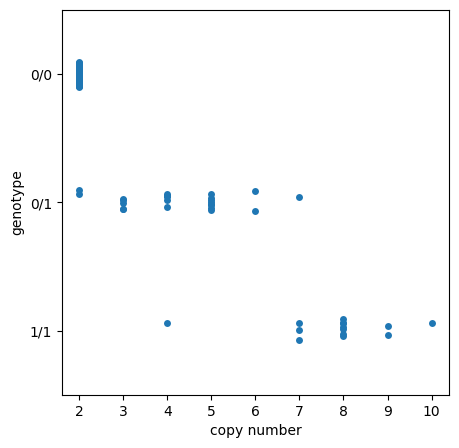

In [ ]:
#linked loci through time and space is what is important for informing insecticide use in vector control.
def genotype_by_copy_number(contig, position, sample_sets):
    import seaborn as sns
    import numpy as np
    import matplotlib.pyplot as plt
    geno = ag3.snp_genotypes(region=f"{contig}:{position}-{position+1}", sample_sets=sample_sets).compute()
    geno = geno[0]
    geno = np.apply_along_axis(arr=geno, func1d=lambda x: "/".join(map(str, x)), axis=1)

    ds_cnv = ag3.gene_cnv(region=f"{contig}:{position}-{position+1}", sample_sets=sample_sets)
    cnv_cn = ds_cnv['CN_mode'].compute().values[0]

    fig, ax = plt.subplots(1,1, figsize=[5,5])
    sns.stripplot(x=cnv_cn, y=geno, order = ['0/0','0/1','1/1'], ax=ax)
    plt.ylabel("genotype")
    plt.xlabel("copy number")
    plt.show()


genotype_by_copy_number(contig="2R", position=3492074, sample_sets="AG1000G-GH")

# **Take home message**
we have demonstrated techniques that allow us to compare the frequency of SNPs and CNVs from the Ag3.0 data release together. However, the real power of these techniques to advance malaria control will come when they are applied to more recent data releases containing samples collected recently as spatial or temporal transects. With these data, associated SNPs and CNVs can be tracked together over space and time.

# **Module 2 - Adaptive gene flow**

**What is gene flow?**
Gene flow is usually defined as the transfer of genetic material from one population to another. But this is a broad definition, and for this training course we are interested in something a bit more specific, which is the transfer of genetic variation (i.e., mutations) between populations. So for our purposes, the term “gene flow” can be a bit misleading, because it is not actually genes which are being transferred, but genetic variants, e.g., SNP or CNV alleles. Strictly speaking, a term like “allele flow” would be more accurate. However, we will use “gene flow” throughout this workshop, because it has become a well-established term in the population genetics literature.

**Gene flow between species (introgression)**
Gene flow can occur between two different species, if members of those species occasionally mate (hybridise) and have fertile offspring. Gene flow between species is commonly known as “introgression” or sometimes as “interspecific gene flow” (“inter” meaning between).

**Spatial gene flow**
Gene flow can also occur between different populations of the same species which are separated spatially, i.e., which live in different locations. This can occur if there is some movement of individuals between locations in each generation, also known as “dispersal” or “migration”. I.e., individuals can move and breed with individuals from a different location. Spatial gene flow is sometimes called “intraspecific gene flow” (“intra” meaning within).

**Adaptive gene flow and shared selective sweeps**
Adaptive gene flow occurs when a beneficial mutation is transferred between species or locations via gene flow. For example, a mutation which confers insecticide resistance.

Because a **benefical mutation** is positively selected, it rises rapidly in frequency within the population where it initially arose. This is also known as a selectice sweep.

If the mutation is then transferred to a second population, and if the mutation is also beneficial in that population, then it will also be positively selected and rise in frequency. In other words, a selective sweep will also occur in the second population.

This type of event is known as “**adaptive gene flow**” because the transfer of the mutation has increased the fitness of the second population. We can also call this a “**shared selective sweep**” because selective sweeps are occurring in both populations and involve mutations with a recent common origin.

**Why is gene flow relevant to malaria vector surveillance and control?**
In short, because gene flow causes the spread of insecticide resistance between mosquito species and countries.

For example, different species of the Anopheles gambiae complex can hybridise, and so insecticide resistance mutations that arise in one species can spread to others. This means that insecticide resistance management strategies cannot focus on any one species in isolation, but have to consider all species with the potential for gene flow together.

**Detecting adaptive introgression via ancestry-informative markers (AIMs)**
We would like to detect adaptive introgression of insecticide resistance mutations between different species in the Anopheles gambiae complex, so that we can learn more about what introgression events have happened in the past, and where and when introgression is most likely to occur.

In [ ]:
#Let’s see an example of an adaptive introgression event which has occurred between An. gambiae and An. coluzzii.
ag3.plot_aim_heatmap(
    aims="gamb_vs_colu",
    sample_query="country == 'Burkina Faso' and aim_species != 'arabiensis'"
)

In this example we can see that the individuals in the upper part of the plot have mostly red (homozygous coluzzii) AIM genotypes, but on chromosome arm 2L have either blue (homozygous gambiae) or yellow (heterozygous) genotypes. This is because an introgression event has occurred from An. gambiae to An. coluzzii transferring the L995F “kdr” mutation which confers resistance to pyrethroids, as first described in Clarkson et al. (2014) and Norris et al. (2015).

# **Exercise **

Can you use AIMs to find any evidence for adaptive introgression between An. gambiae and An. arabiensis in **Tanzania**?

In [ ]:
#Let’s see an example of an adaptive introgression event which has occurred between An. gambiae and An. coluzzii.
ag3.plot_aim_heatmap(
    aims="gamb_vs_colu",
    sample_query="country == 'Tanzania' and aim_species != 'arabiensis'"
)

**Limitations of using AIMs for detecting adaptive introgression**

There are some important limitations to using AIMs for detecting adaptive introgression. In particular, the AIMs are sparsely distributed throughout the genome, leaving big gaps where introgression events may occur but go undetected. The “gamb_vs_colu” AIMs are also not evenly distributed across the genome, but are clustered in just a few genome locations, particularly centromeric regions, making the problem even worse.


**Genome-wide scans for adaptive gene flow**
There are a number of different methods that can be used to scan the whole genome for signals of adaptive gene flow between species or geographically separated populations.

In this module we will demonstrate one approach, which looks for higher than usual levels of haplotype sharing between two groups (cohorts) of mosquitoes.

In [ ]:
#We will do this for two cohorts of mosquitoes collected near Bobo Dioulasso (Houet province) in Burkina Faso, one An. gambiae and one An. coluzzii.
#First check which cohorts have been defined for Burkina Faso, and how many samples are available for each cohort.
df_samples = ag3.sample_metadata()

In [ ]:
df_samples.query("country == 'Burkina Faso'")["cohort_admin2_year"].value_counts()

BF-09_Houet_gamb_2012     99
BF-09_Houet_colu_2012     82
BF-09_Houet_colu_2014     53
BF-09_Houet_gamb_2014     46
BF-07_Bazega_gamb_2004    13
BF-09_Houet_arab_2014      3
Name: cohort_admin2_year, dtype: int64

In [ ]:
#Calibrate the H12 window size for two cohorts of interest.
ag3.plot_h12_calibration(
    contig="3L",
    analysis="gamb_colu",
    sample_query="cohort_admin2_year == 'BF-09_Houet_colu_2014'",
)

Load haplotypes:   0%|          | 0/176 [00:00<?, ?it/s]

Compute H12:   0%|          | 0/8 [00:00<?, ?it/s]

In [ ]:
ag3.plot_h12_calibration(
    contig="3L",
    analysis="gamb_colu",
    sample_query="cohort_admin2_year == 'BF-09_Houet_gamb_2014'",
)

Load haplotypes:   0%|          | 0/176 [00:00<?, ?it/s]

Compute H12:   0%|          | 0/8 [00:00<?, ?it/s]

A window size of around 1000 SNPs looks reasonable for both cohorts.

In [ ]:
#run genome-wide selection scans. Let’s just run chromosome arm 2L
ag3.plot_h12_gwss(
    contig="2L",
    analysis="gamb_colu",
    sample_query="cohort_admin2_year == 'BF-09_Houet_colu_2014'",
    window_size=1000,
)

Load haplotypes:   0%|          | 0/228 [00:00<?, ?it/s]

In [ ]:
ag3.plot_h12_gwss(
    contig="2L",
    analysis="gamb_colu",
    sample_query="cohort_admin2_year == 'BF-09_Houet_gamb_2014'",
    window_size=1000,
)

Load haplotypes:   0%|          | 0/228 [00:00<?, ?it/s]

We can see evidence for several selective sweeps. In particular, there is a strong signal in both cohorts at around position 2.4 Mbp. The signal gets a bit fuzzy on the left hand side, because it occurs on the edge of the pericentromeric region, where there are lower rates of recombination. But this is a genome location where selective sweeps are often found, because it’s the location of the voltage-gated sodium channel gene (Vgsc), where mutations confer resistance to pyrethroids.

**Detecting shared selective sweeps via haplotype frequencies**
To detect shared selective sweeps, we can make use of some of the same ideas used by the H12 statistic to discover selective sweeps. In particular, we can compute haplotype frequencies in windows across the genome, and look for unusual patterns of haplotype frequencies in some windows relative to the genome-wide distribution.

In [ ]:
# The plot_h1x_gwss() function will perform a genome-wide scan using the H1X statistic.
#First Let’s examine the parameters of this function.
ag3.plot_h1x_gwss?

**detecting adaptive introgression**
Let’s now use this new statistic and function to look for evidence of adaptive introgression between An. gambiae and An. coluzzii cohorts from Burkina Faso

Recall that on chromosome arm 2L we saw evidence for selective sweeps in both cohorts at around 2.4 Mbp.


In [ ]:
ag3.plot_h1x_gwss(
    contig="2L",
    analysis="gamb_colu",
    cohort1_query="cohort_admin2_year == 'BF-09_Houet_colu_2014'",
    cohort2_query="cohort_admin2_year == 'BF-09_Houet_gamb_2014'",
    window_size=1000,
)

Load haplotypes for cohort 1:   0%|          | 0/228 [00:00<?, ?it/s]

Load haplotypes for cohort 2:   0%|          | 0/228 [00:00<?, ?it/s]

**Exercise 2**

Look for shared selective sweeps between the same An. gambiae and An. coluzzii cohorts from Burkina Faso, but on chromosome arm 2R instead of 2L. This involves three steps:

Run a H12 selection scan in the BF-09_Houet_colu_2014 cohort

Run a H12 selection scan in the BF-09_Houet_gamb_2014 cohort

Rnu a H1X scan between these two cohorts

In [ ]:
#BF-09_Houet_colu_2014 cohort

#Run a H12 selection scan in the BF-09_Houet_colu_2014 cohort
ag3.plot_h12_calibration(
    contig="2L",
    analysis="gamb_colu",
    sample_query="cohort_admin2_year == 'BF-09_Houet_colu_2014'",
)

Load haplotypes:   0%|          | 0/228 [00:00<?, ?it/s]

Compute H12:   0%|          | 0/8 [00:00<?, ?it/s]

In [ ]:
ag3.plot_h12_calibration(
    contig="3L",
    analysis="gamb_colu",
    sample_query="cohort_admin2_year == 'BF-09_Houet_colu_2014'",
)

Load haplotypes:   0%|          | 0/176 [00:00<?, ?it/s]

Compute H12:   0%|          | 0/8 [00:00<?, ?it/s]

In [ ]:
#Run genome-wide selection scans. Let’s just run chromosome arm 3L
ag3.plot_h12_gwss(
    contig="3L",
    analysis="gamb_colu",
    sample_query="cohort_admin2_year == 'BF-09_Houet_colu_2014'",
    window_size=1000,
)

Load haplotypes:   0%|          | 0/176 [00:00<?, ?it/s]

In [ ]:
ag3.plot_h12_gwss(
    contig="3L",
    analysis="gamb_colu",
    sample_query="cohort_admin2_year == 'BF-09_Houet_colu_2014'",
    window_size=1000,
)

In [ ]:
#BF-09_Houet_colu_2014 cohort

ag3.plot_h12_calibration(
    contig="2L",
    analysis="gamb_colu",
    sample_query="cohort_admin2_year == 'BF-09_Houet_colu_2014'",
)
#Run a H12 selection scan in the BF-09_Houet_colu_2014 cohort